# Whatsapp Chat Analyzer

In [12]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [13]:
f = open('WhatsApp Chat with B18101-A.txt','r',encoding='utf-8')
data = f.read()

In [14]:
dummy = data.split('\n')
dummy

['1/29/19, 13:15 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '1/29/19, 11:31 - AJ created group "Only CR can speak"',
 '1/29/19, 11:35 - AJ added you',
 "1/29/19, 11:36 - Amaan Cr changed this group's settings to allow only admins to send messages to this group",
 '1/29/19, 11:39 - AJ added Babur Ubit, Owais Hasnain(Ku), Owais Iqbal Ku, +92 305 3877741, and +92 349 1947978',
 '1/29/19, 11:49 - AJ added Asfar Hoorani(UBIT), +92 311 2341903, and +92 333 2107606',
 '1/29/19, 11:41 - Amaan Cr: Guys there is no class of english today.',
 "1/29/19, 13:30 - Amaan Cr: The thing is that sir isn't picking my call so, now it's up to you all if you wanna leave you can.",
 '1/29/19, 13:48 - +92 349 1947978 left',
 '1/29/19, 17:38 - Amaan Cr added Sohaib',
 "1/29/19, 21:02 - Amaan Cr: Miss Humera  muzaffar our PST will take tomorrow's class.",
 '1/29/19, 21:18 - Amaan Cr added Anas Ubit',
 "1/29/19, 

### Regex for separating dateTime & msgs

In [15]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
# pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[AP]M\s-\s'
messages = re.split(pattern,data)[1:]
print(len(messages))

## extracting dates as well in different col
dates = re.findall(pattern,data)
print(len(dates))

1744
1744


### Breaking dateTime into date & time

In [16]:
# this is a simple time string,we will appply this kind of transformation
# inorder to get the date and the time for our analysis
string = '16/08/18, 20:09 - '
string = string.split(',')
date,time = string[0],string[1]
time = time.split('-')
time = time[0].strip()
print(date+" and "+time)

16/08/18 and 20:09


In [17]:
# this function is to seperate the time and date

def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return date+" "+time

### dataframe for messages and dateTime

In [18]:
df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,1/29/19 13:15
1,"AJ created group ""Only CR can speak""\n",1/29/19 11:31
2,AJ added you\n,1/29/19 11:35
3,Amaan Cr changed this group's settings to allo...,1/29/19 11:36
4,"AJ added Babur Ubit, Owais Hasnain(Ku), Owais ...",1/29/19 11:39


In [19]:
df.shape

(1744, 2)

### Breaking messages into username & msgs

In [20]:
'''
so here we can see that the username is at index 1 and message is at index2

sometimes it happens that we get the group notification,so 
for that case we have to handle it accordingly!
'''
users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
df['User'] = users
df['message'] = messages



def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})

df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. N...,1/29/19 13:15,Group Notification
1,"AJ created group ""Only CR can speak""",1/29/19 11:31,Group Notification
2,AJ added you,1/29/19 11:35,Group Notification
3,Amaan Cr changed this group's settings to allo...,1/29/19 11:36,Group Notification
4,"AJ added Babur Ubit, Owais Hasnain(Ku), Owais ...",1/29/19 11:39,Group Notification


In [21]:
df.shape   # (row, column)

(1744, 3)

### DateandTime with variety

In [37]:
df['Only_date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()

df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

,Message,Date,User,Only_date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,1/29/19 13:15,Group Notification,2019-01-29,2019,1,January,29,Tuesday,13,15
1,"AJ created group ""Only CR can speak""",1/29/19 11:31,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,31
2,AJ added you,1/29/19 11:35,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,35
3,Amaan Cr changed this group's settings to allo...,1/29/19 11:36,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,36
4,"AJ added Babur Ubit, Owais Hasnain(Ku), Owais ...",1/29/19 11:39,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,39


In [39]:
# st.dataframe(df)

### for Specific Person one person analytic

In [38]:
df[df['User'] == 'Amaan Cr']

,Message,Date,User,Only_date,Year,Month_num,Month,Day,Day_name,Hour,Minute
6,Guys there is no class of english today.,1/29/19 11:41,Amaan Cr,2019-01-29,2019,1,January,29,Tuesday,11,41
7,The thing is that sir isn't picking my call so...,1/29/19 13:30,Amaan Cr,2019-01-29,2019,1,January,29,Tuesday,13,30
10,Miss Humera muzaffar our PST will take tomorr...,1/29/19 21:02,Amaan Cr,2019-01-29,2019,1,January,29,Tuesday,21,2
12,Our islamiat teacher also gonna take his tomor...,1/29/19 21:14,Amaan Cr,2019-01-29,2019,1,January,29,Tuesday,21,14
13,<Media omitted>,1/29/19 21:16,Amaan Cr,2019-01-29,2019,1,January,29,Tuesday,21,16
...,...,...,...,...,...,...,...,...,...,...,...
1188,<Media omitted>,2/24/21 20:17,Amaan Cr,2021-02-24,2021,2,February,24,Wednesday,20,17
1218,The students are instructed to park there byke...,3/8/21 12:45,Amaan Cr,2021-03-08,2021,3,March,8,Monday,12,45
1247,<Media omitted>,3/25/21 19:40,Amaan Cr,2021-03-25,2021,3,March,25,Thursday,19,40
1248,,3/25/21 19:40,Amaan Cr,2021-03-25,2021,3,March,25,Thursday,19,40


## Total Words (Count)

In [39]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

11436


In [40]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'AJ',
 'created',
 'group',
 '"Only',
 'CR',
 'can',
 'speak"',
 'AJ',
 'added',
 'you',
 'Amaan',
 'Cr',
 'changed',
 'this',
 "group's",
 'settings',
 'to',
 'allow',
 'only',
 'admins',
 'to',
 'send',
 'messages',
 'to',
 'this',
 'group',
 'AJ',
 'added',
 'Babur',
 'Ubit,',
 'Owais',
 'Hasnain(Ku),',
 'Owais',
 'Iqbal',
 'Ku,',
 '+92',
 '305',
 '3877741,',
 'and',
 '+92',
 '349',
 '1947978',
 'AJ',
 'added',
 'Asfar',
 'Hoorani(UBIT),',
 '+92',
 '311',
 '2341903,',
 'and',
 '+92',
 '333',
 '2107606',
 'Guys',
 'there',
 'is',
 'no',
 'class',
 'of',
 'english',
 'today.',
 'The',
 'thing',
 'is',
 'that',
 'sir',
 "isn't",
 'picking',
 'my',
 'call',
 'so,',
 'now',
 "it's",
 'up',
 'to',
 'you',
 'all',
 'if',
 'you',
 'wanna',
 'leave',
 'yo

## Media

In [41]:
df[df['Message'] == '<Media omitted>']

,Message,Date,User,Only_date,Year,Month_num,Month,Day,Day_name,Hour,Minute
13,<Media omitted>,1/29/19 21:16,Amaan Cr,2019-01-29,2019,1,January,29,Tuesday,21,16
14,<Media omitted>,1/29/19 21:16,Amaan Cr,2019-01-29,2019,1,January,29,Tuesday,21,16
17,<Media omitted>,1/30/19 19:05,Amaan Cr,2019-01-30,2019,1,January,30,Wednesday,19,5
18,<Media omitted>,1/30/19 20:25,Amaan Cr,2019-01-30,2019,1,January,30,Wednesday,20,25
20,<Media omitted>,1/30/19 20:25,Amaan Cr,2019-01-30,2019,1,January,30,Wednesday,20,25
...,...,...,...,...,...,...,...,...,...,...,...
1718,<Media omitted>,12/19/21 12:40,Bisma Cr,2021-12-19,2021,12,December,19,Sunday,12,40
1719,<Media omitted>,12/19/21 12:40,Bisma Cr,2021-12-19,2021,12,December,19,Sunday,12,40
1721,<Media omitted>,12/20/21 14:38,Bisma Cr,2021-12-20,2021,12,December,20,Monday,14,38
1724,<Media omitted>,12/21/21 17:28,Imtiaz Ku,2021-12-21,2021,12,December,21,Tuesday,17,28


In [42]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Amaan Cr')].shape

(134, 11)

In [43]:
df['Message'].unique()

array(['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
       'AJ created group "Only CR can speak"', 'AJ added you', ...,
       'Folio3 recruitment drive on Monday Jan 10th 2022 at 12:00pm',
       'https://www.facebook.com/1490281214546061/posts/3085557625018404/?sfnsn=scwspmo',
       'Considering difficulty for students due to weather condition, lab submission and viva that was scheduled tomorrow is now rescheduled on Friday.'],
      dtype=object)

In [44]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only_date,Year,Month_num,Month,Day,Day_name,Hour,Minute
13,<Media omitted>,1/29/19 21:16,Amaan Cr,2019-01-29,2019,1,January,29,Tuesday,21,16
14,<Media omitted>,1/29/19 21:16,Amaan Cr,2019-01-29,2019,1,January,29,Tuesday,21,16
17,<Media omitted>,1/30/19 19:05,Amaan Cr,2019-01-30,2019,1,January,30,Wednesday,19,5
18,<Media omitted>,1/30/19 20:25,Amaan Cr,2019-01-30,2019,1,January,30,Wednesday,20,25
20,<Media omitted>,1/30/19 20:25,Amaan Cr,2019-01-30,2019,1,January,30,Wednesday,20,25
...,...,...,...,...,...,...,...,...,...,...,...
1718,<Media omitted>,12/19/21 12:40,Bisma Cr,2021-12-19,2021,12,December,19,Sunday,12,40
1719,<Media omitted>,12/19/21 12:40,Bisma Cr,2021-12-19,2021,12,December,19,Sunday,12,40
1721,<Media omitted>,12/20/21 14:38,Bisma Cr,2021-12-20,2021,12,December,20,Monday,14,38
1724,<Media omitted>,12/21/21 17:28,Imtiaz Ku,2021-12-21,2021,12,December,21,Tuesday,17,28


## Busy user

In [45]:
df['User'].value_counts().head()

Bisma Cr              680
Amaan Cr              502
Imtiaz Ku             216
Namira Cr             182
Group Notification    114
Name: User, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

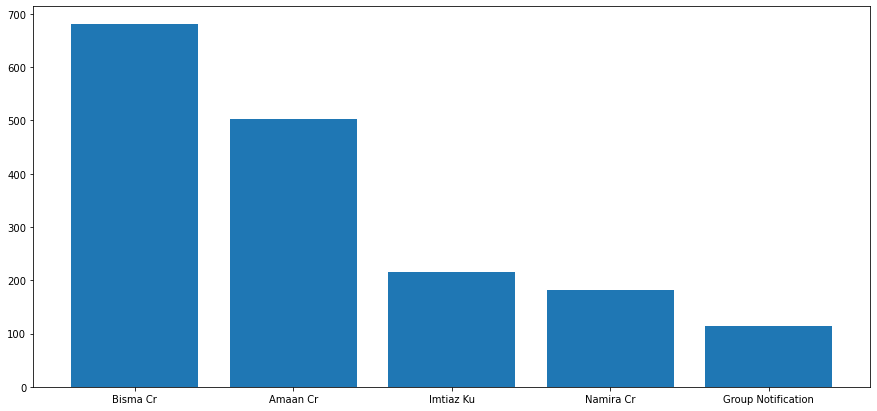

In [47]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'horizontal')


## Monthly timeline

In [ ]:
plt.plot(time['Time'], time['Message'])
plt,

## WordCloud

In [25]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))
wordmap

{'<Media': 455,
 'omitted>': 455,
 'class': 355,
 'will': 284,
 'be': 229,
 'to': 216,
 'the': 195,
 'on': 186,
 'tomorrow': 180,
 'held': 168,
 'of': 154,
 'at': 128,
 'and': 127,
 'in': 125,
 'from': 106,
 'time': 99,
 'have': 96,
 '+92': 94,
 'tomorrow.': 84,
 'for': 81,
 'is': 78,
 'as': 77,
 'lab': 58,
 'added': 56,
 'Class': 50,
 'you': 49,
 'has': 49,
 'this': 47,
 'all': 47,
 'your': 47,
 'our': 45,
 'a': 44,
 'been': 43,
 'are': 42,
 'left': 41,
 'per': 41,
 'Cr': 40,
 'that': 38,
 'message': 36,
 'students': 35,
 'no': 34,
 'assignment': 34,
 'We': 33,
 'with': 33,
 'No': 32,
 'not': 32,
 'This': 32,
 'was': 32,
 'me': 32,
 'schedule.': 29,
 'classes': 28,
 'deleted': 28,
 'k': 27,
 'who': 27,
 'class.': 26,
 'sir': 25,
 'we': 25,
 'or': 24,
 'kindly': 23,
 'by': 23,
 'physics': 23,
 'after': 23,
 'Bisma': 22,
 '12': 22,
 'can': 21,
 'English': 21,
 '9': 21,
 'stats': 21,
 '11': 21,
 'Kindly': 21,
 'And': 20,
 'any': 20,
 'ics': 20,
 'All': 19,
 "we'll": 19,
 'link': 19,
 'th

## Most common words

In [22]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,<Media,455
1,omitted>,455
2,class,355
3,will,284
4,be,229
5,to,216
6,the,195
7,on,186
8,tomorrow,180
9,held,168


In [23]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only_date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,1/29/19 13:15,Group Notification,2019-01-29,2019,1,January,29,Tuesday,13,15
1,"AJ created group ""Only CR can speak""",1/29/19 11:31,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,31
2,AJ added you,1/29/19 11:35,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,35
3,Amaan Cr changed this group's settings to allo...,1/29/19 11:36,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,36
4,"AJ added Babur Ubit, Owais Hasnain(Ku), Owais ...",1/29/19 11:39,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,39
...,...,...,...,...,...,...,...,...,...,...,...
1739,1st Half,1/3/22 19:53,Imtiaz Ku,2022-01-03,2022,1,January,3,Monday,19,53
1740,Folio3 recruitment drive on Monday Jan 10th 20...,1/4/22 17:53,Bisma Cr,2022-01-04,2022,1,January,4,Tuesday,17,53
1741,https://www.facebook.com/1490281214546061/post...,1/4/22 17:54,Bisma Cr,2022-01-04,2022,1,January,4,Tuesday,17,54
1742,Considering difficulty for students due to wea...,1/4/22 22:28,+92 333 2502707,2022-01-04,2022,1,January,4,Tuesday,22,28


In [24]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon

mostcommon = gettopwords('Overall',df)
mostcommon

,0,1
0,<media,455
1,omitted>,455
2,class,406
3,tomorrow,183
4,held,168
5,time,101
6,+92,94
7,tomorrow.,86
8,lab,75
9,added,56


# Emoji

In [ ]:
import emoji

In [ ]:
def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
        
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    return emojidf


dfmoji = emojihelp('Overall',df)
dfmoji

In [ ]:
dfmoji.columns = ['Emoji','Count']
dfmoji

,Emoji,Count
0,✋,183
1,🏻,88
2,😂,41
3,👍,39
4,👆,38
...,...,...
69,✨,1
70,🔝,1
71,🙌,1
72,🤟,1


In [53]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,1/29/19 13:15,Group Notification,2019-01-29,2019,1,January,29,Tuesday,13,15
1,"AJ created group ""Only CR can speak""",1/29/19 11:31,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,31
2,AJ added you,1/29/19 11:35,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,35
3,Amaan Cr changed this group's settings to allo...,1/29/19 11:36,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,36
4,"AJ added Babur Ubit, Owais Hasnain(Ku), Owais ...",1/29/19 11:39,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,39


# Monthly Timeline

In [25]:
def monthtimeline(selecteduser,df):

    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    return temp

In [49]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,1/29/19 13:15,Group Notification,2019-01-29,2019,1,January,29,Tuesday,13,15
1,"AJ created group ""Only CR can speak""",1/29/19 11:31,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,31
2,AJ added you,1/29/19 11:35,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,35
3,Amaan Cr changed this group's settings to allo...,1/29/19 11:36,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,36
4,"AJ added Babur Ubit, Owais Hasnain(Ku), Owais ...",1/29/19 11:39,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,39


In [26]:
temp = df.groupby(['Year','Month_num','Month']).count()
temp

Message  Date  User  Only_date  Day  Day_name  Hour  \
Year Month_num Month                                                            
2019 1         January         23    23    23         23   23        23    23   
     2         February        76    76    76         76   76        76    76   
     3         March           53    53    53         53   53        53    53   
     4         April           68    68    68         68   68        68    68   
     5         May            116   116   116        116  116       116   116   
     9         September       27    27    27         27   27        27    27   
     10        October         57    57    57         57   57        57    57   
     11        November        59    59    59         59   59        59    59   
     12        December        28    28    28         28   28        28    28   
2020 1         January         74    74    74         74   74        74    74   
     2         February        40    40    40         40   40        40    40   
     3         March           13    13    13         13   13        13    13   
     4         April            8     8     8          8    8         8     8   
     5         May              8     8     8          8    8         8     8   
     6         June            59    59    59         59   59        59    59   
     7         July            55    55    55         55   55        55    55   
     8         August          35    35    35         35   35        35    35   
     9         September       36    36    36         36   36        36    36   
     10        October         68    68    68         68   68        68    68   
     11        November        51    51    51         51   51        51    51   
     12        December        54    54    54         54   54        54    54   
2021 1         January        143   143   143        143  143       143   143   
     2         February        49    49    49         49   49        49    49   
     3         March           56    56    56         56   56        56    56   
     4         April           53    53    53         53   53        53    53   
     5         May             30    30    30         30   30        30    30   
     6         June            52    52    52         52   52        52    52   
     7         July            21    21    21         21   21        21    21   
     8         August          35    35    35         35   35        35    35   
     9         September       77    77    77         77   77        77    77   
     10        October         64    64    64         64   64        64    64   
     11        November        96    96    96         96   96        96    96   
     12        December        50    50    50         50   50        50    50   
2022 1         January         10    10    10         10   10        10    10   

                          Minute  
Year Month_num Month              
2019 1         January        23  
     2         February       76  
     3         March          53  
     4         April          68  
     5         May           116  
     9         September      27  
     10        October        57  
     11        November       59  
     12        December       28  
2020 1         January        74  
     2         February       40  
     3         March          13  
     4         April           8  
     5         May             8  
     6         June           59  
     7         July           55  
     8         August         35  
     9         September      36  
     10        October        68  
     11        November       51  
     12        December       54  
2021 1         January       143  
     2         February       49  
     3         March          56  
     4         April          53  
     5         May            30  
     6         June           52  
     7         July           21  
     8         August         35  
     9         September

In [27]:
# into panda form
temp = df.groupby(['Year','Month_num','Month']).count()['Message']
temp

Year  Month_num  Month    
2019  1          January       23
      2          February      76
      3          March         53
      4          April         68
      5          May          116
      9          September     27
      10         October       57
      11         November      59
      12         December      28
2020  1          January       74
      2          February      40
      3          March         13
      4          April          8
      5          May            8
      6          June          59
      7          July          55
      8          August        35
      9          September     36
      10         October       68
      11         November      51
      12         December      54
2021  1          January      143
      2          February      49
      3          March         56
      4          April         53
      5          May           30
      6          June          52
      7          July          21
      8          Augu

In [53]:
# into Dataframe
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2019,1,January,23
1,2019,2,February,76
2,2019,3,March,53
3,2019,4,April,68
4,2019,5,May,116
5,2019,9,September,27
6,2019,10,October,57
7,2019,11,November,59
8,2019,12,December,28
9,2020,1,January,74


In [28]:
temp.shape

(34,)

In [29]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

KeyError: 'Month'

In [30]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

KeyError: 'Month'

In [115]:
temp

,Year,Month_num,Month,Message,Time
0,2019,1,January,23,January-2019
1,2019,2,February,76,February-2019
2,2019,3,March,53,March-2019
3,2019,4,April,68,April-2019
4,2019,5,May,116,May-2019
5,2019,9,September,27,September-2019
6,2019,10,October,57,October-2019
7,2019,11,November,59,November-2019
8,2019,12,December,28,December-2019
9,2020,1,January,74,January-2020


## Activity maps

In [117]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,1/29/19 13:15,Group Notification,2019-01-29,2019,1,January,29,Tuesday,13,15
1,"AJ created group ""Only CR can speak""",1/29/19 11:31,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,31
2,AJ added you,1/29/19 11:35,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,35
3,Amaan Cr changed this group's settings to allo...,1/29/19 11:36,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,36
4,"AJ added Babur Ubit, Owais Hasnain(Ku), Owais ...",1/29/19 11:39,Group Notification,2019-01-29,2019,1,January,29,Tuesday,11,39


### 1- Weekly activity

In [31]:
temp1 = df['Day_name'].value_counts()
temp1

Tuesday      362
Wednesday    298
Monday       282
Thursday     258
Sunday       232
Friday       166
Saturday     146
Name: Day_name, dtype: int64

In [121]:
list(temp1.index)

['Tuesday', 'Wednesday', 'Monday', 'Thursday', 'Sunday', 'Friday', 'Saturday']

In [32]:
list(temp1.values)

[362, 298, 282, 258, 232, 166, 146]

### 2- Monthly activity

In [33]:
temp2 = df['Month'].value_counts()
temp2

January      250
November     206
October      189
February     165
May          154
September    140
December     132
April        129
March        122
June         111
July          76
August        70
Name: Month, dtype: int64

In [126]:
list(temp2.index),list(temp2.values)

(['January',
  'November',
  'October',
  'February',
  'May',
  'September',
  'December',
  'April',
  'March',
  'June',
  'July',
  'August'],
 [250, 206, 189, 165, 154, 140, 132, 129, 122, 111, 76, 70])